In [2]:
import os
import glob
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data imports

In [3]:
# path muss angepasst werden
file_path_2016 = "data/2016/Unfallorte_2016_LinRef.txt"
file_path_2017 = "data/2017/Unfallorte2017_LinRef.txt"
file_path_2018 = "data/2018/Unfallorte2018_LinRef.txt"
file_path_2019 = "data/2019/Unfallorte2019_LinRef.txt"

In [4]:
df2016_raw = pd.read_csv(file_path_2016,sep=";")
df2017_raw = pd.read_csv(file_path_2017,sep=";")
df2018_raw = pd.read_csv(file_path_2018,sep=";")
df2019_raw = pd.read_csv(file_path_2019,sep=";")

C:\Users\nschumpp\Anaconda3\envs\test\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df2016_raw.head()

,FID,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,0,1,1,0,53,120,2016,1,9,5,...,0,1,0,0,0,0,606982.3940,5.954660e+06,10.621659,53.729615
1,1,2,1,0,57,10,2016,1,17,3,...,0,1,0,0,0,0,574882.5330,6.011441e+06,10.149176,54.245453
2,2,3,1,0,62,8,2016,1,0,5,...,0,1,0,0,0,0,599934.6875,5.964609e+06,10.518094,53.820403
3,3,4,1,0,3,0,2016,1,15,5,...,1,0,0,0,0,1,610709.3487,5.968284e+06,10.683021,53.851243
4,4,5,1,0,55,28,2016,1,14,1,...,0,1,0,0,0,0,605690.7904,6.009152e+06,10.620986,54.219459


In [6]:
df2017_raw.head()

,OBJECTID,UIDENTSTLA,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstPKW,IstFuss,IstKrad,IstSonstig,LICHT,STRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,1,1170113152013852017,1,0,55,12,2017,1,5,6,...,1,0,0,0,2,2,605079.4229,6.001758e+06,10.609031,54.153150
1,2,1170113171013912017,1,0,60,53,2017,1,6,6,...,0,1,0,1,2,1,582297.2184,5.969289e+06,10.251498,53.865551
2,3,1170106105132242017,1,0,61,11,2017,1,18,6,...,1,0,0,0,2,1,522799.3000,5.990576e+06,9.348344,54.062897
3,4,1170114152013542018,1,0,55,42,2017,1,12,7,...,1,0,0,0,0,0,616128.9378,5.981557e+06,10.770405,53.969302
4,5,1170106161013732017,1,0,62,60,2017,1,8,6,...,1,0,0,0,0,1,581575.9987,5.934905e+06,10.231475,53.556684


In [8]:
df2017_raw.iloc[:2]

,OBJECTID,UIDENTSTLA,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstPKW,IstFuss,IstKrad,IstSonstig,LICHT,STRZUSTAND,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
0,1,1170113152013852017,1,0,55,12,2017,1,5,6,...,1,0,0,0,2,2,605079.4229,6.001758e+06,10.609031,54.153150
1,2,1170113171013912017,1,0,60,53,2017,1,6,6,...,0,1,0,1,2,1,582297.2184,5.969289e+06,10.251498,53.865551


In [9]:
# new dataframe (2016 + 2017)
dfs = [df2016_raw,df2017_raw]
df_concat = pd.concat(dfs)
# new datafram (2016 + 2017 + 2018 + 2019)
df_all = [df2016_raw,df2017_raw,df2018_raw,df2019_raw]
df_concat_all = pd.concat(df_all)

In [10]:
df2016_raw.shape

(151673, 25)

In [11]:
df2017_raw.shape

(195229, 24)

In [12]:
df2018_raw.shape

(211868, 24)

In [13]:
df2019_raw.shape

(268370, 24)

In [14]:
df_concat_all.shape

(827140, 30)

In [15]:
df_concat_all.head()

,FID,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,UIDENTSTLA,LICHT,STRZUSTAND,OBJECTID_1,IstSonstige
0,0.0,1.0,1,0,53,120,2016,1,9,5,...,0.0,606982.3940,5.954660e+06,10.621659,53.729615,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,1,0,57,10,2016,1,17,3,...,0.0,574882.5330,6.011441e+06,10.149176,54.245453,NaN,NaN,NaN,NaN,NaN
2,2.0,3.0,1,0,62,8,2016,1,0,5,...,0.0,599934.6875,5.964609e+06,10.518094,53.820403,NaN,NaN,NaN,NaN,NaN
3,3.0,4.0,1,0,3,0,2016,1,15,5,...,1.0,610709.3487,5.968284e+06,10.683021,53.851243,NaN,NaN,NaN,NaN,NaN
4,4.0,5.0,1,0,55,28,2016,1,14,1,...,0.0,605690.7904,6.009152e+06,10.620986,54.219459,NaN,NaN,NaN,NaN,NaN


In [16]:
df_concat_all.head()

,FID,OBJECTID,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,UIDENTSTLA,LICHT,STRZUSTAND,OBJECTID_1,IstSonstige
0,0.0,1.0,1,0,53,120,2016,1,9,5,...,0.0,606982.3940,5.954660e+06,10.621659,53.729615,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,1,0,57,10,2016,1,17,3,...,0.0,574882.5330,6.011441e+06,10.149176,54.245453,NaN,NaN,NaN,NaN,NaN
2,2.0,3.0,1,0,62,8,2016,1,0,5,...,0.0,599934.6875,5.964609e+06,10.518094,53.820403,NaN,NaN,NaN,NaN,NaN
3,3.0,4.0,1,0,3,0,2016,1,15,5,...,1.0,610709.3487,5.968284e+06,10.683021,53.851243,NaN,NaN,NaN,NaN,NaN
4,4.0,5.0,1,0,55,28,2016,1,14,1,...,0.0,605690.7904,6.009152e+06,10.620986,54.219459,NaN,NaN,NaN,NaN,NaN


In [17]:
#Fahrradunfälle in HH
Fahrrad_Unfall_HH = df_concat_all.loc[(df_concat_all["ULAND"]==2) & (df_concat_all["IstRad"]==1)]
Fahrrad_Unfall_HH.shape


(9019, 30)

## Data cleansing

In [18]:
# Zuweisung zu neuer Spalte mit Namen `x_coord_short`
df_raw['x_coord_short']=round(df_raw['XGCSWGS84'],3)
df_raw['y_coord_short']=round(df_raw['YGCSWGS84'],3)

NameError: name 'df_raw' is not defined

## Data visualising

In [19]:
sns.countplot(data=df, x="UMONAT")

NameError: name 'df' is not defined

[Text(0.5, 0, 'Monat'), Text(0, 0.5, 'Zähler')]

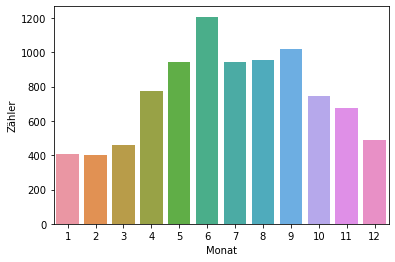

In [20]:
ax = sns.countplot(data=Fahrrad_Unfall_HH, x="UMONAT")
ax.set(xlabel='Monat', ylabel='Zähler')

[Text(0.5, 0, 'Monat'), Text(0, 0.5, 'Zähler')]

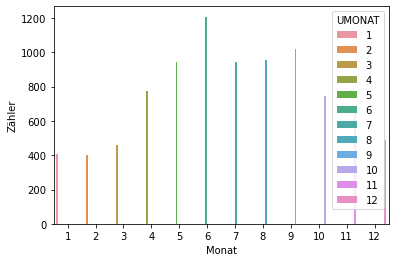

In [21]:

ax = sns.countplot(data=Fahrrad_Unfall_HH, hue='UMONAT', x="UMONAT")
ax.set(xlabel='Monat', ylabel='Zähler')

#sns.countplot(x ='sex', hue = "smoker", data = df)

In [22]:
Fahrrad_Unfall_HH.head

<bound method NDFrame.head of            FID  OBJECTID  ULAND  UREGBEZ  UKREIS  UGEMEINDE  UJAHR  UMONAT  \
6188    6188.0    6189.0      2        6       2        603   2016       4   
6572    6572.0    6573.0      2        4       2        405   2016       2   
6589    6589.0    6590.0      2        4       8        418   2016       3   
6606    6606.0    6607.0      2        3       6        318   2016       3   
6695    6695.0    6696.0      2        2       9        221   2016       1   
...        ...       ...    ...      ...     ...        ...    ...     ...   
163316     NaN  163317.0      2        2       5        215   2019      12   
163319     NaN  163320.0      2        1      18        139   2019      12   
163321     NaN  163322.0      2        3       2        312   2019      12   
163323     NaN  163324.0      2        7      14        715   2019      12   
163330     NaN  163331.0      2        5       5        513   2019      12   

        USTUNDE  UWOCHENTAG  ... 

In [127]:
# Monat/ Wochentag/ Uhrzeit abhängig von der schwere des Unfalles; Uhrzeit unabhängige Variable (x); schwere des Unfalles: abhängige Variable (y)
#(7,8,9 sind Monat, Wochentag, Uhrzeit)
x=Fahrrad_Unfall_HH.iloc[:,[3, 4, 5]]
y=Fahrrad_Unfall_HH.iloc[:,[10]]
f=Fahrrad_Unfall_HH.iloc[:,[3]]

f


,UREGBEZ
6188,6
6572,4
6589,4
6606,3
6695,2
...,...
163316,2
163319,1
163321,3
163323,7


In [128]:
from sklearn.model_selection import train_test_split

In [129]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
#first parameter is indepdenend variable
#test_size percentage of data_set 20% Test Part 

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
regressor=DecisionTreeRegressor(random_state=0)

In [132]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [133]:
output= regressor.predict(x_test)
#Testdaten sind da, um zu schauen wie gut die Daten sind

In [134]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [135]:
#die Vorhersage der Unfallschwere ist mit einer Wahrscheinlichkeit von 89% richtig
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9085365853658537


In [136]:
output

array([2.91666667, 2.87640449, 2.88888889, ..., 2.9047619 , 2.94915254,
       2.91935484])

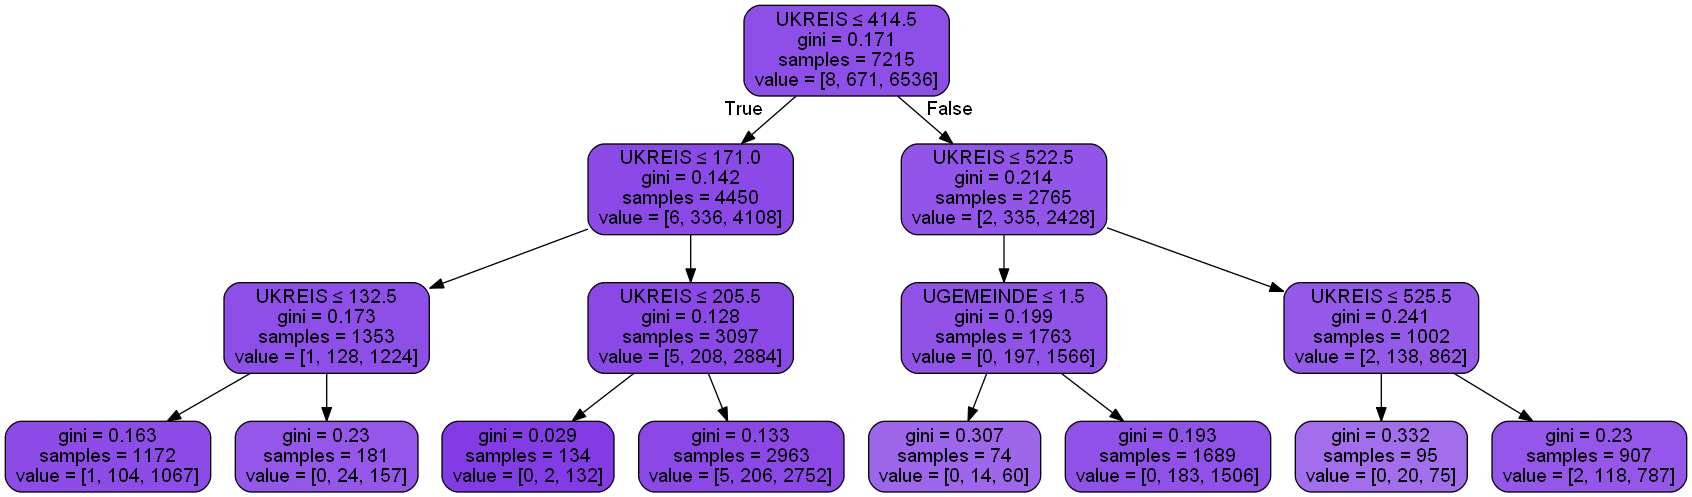

In [137]:
feature_cols = [ 'UREGBEZ', 'UGEMEINDE', 'UKREIS']
from IPython.display import Image
import six
import pydotplus
import pandas as pd
from six import StringIO
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('FahrradUnfall.png')
Image(graph.create_png())

array([3], dtype=int64)

In [67]:
#from sklearn.datasets import load_iris
#from sklearn import tree

#X, y = load_iris(return_X_y=True)
#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(X, y)

In [76]:

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(t, z)

[Text(167.4, 199.32, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.5230

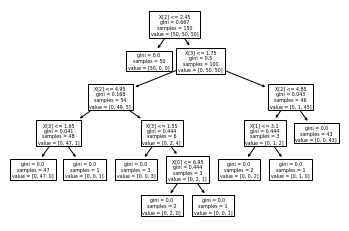

In [68]:
tree.plot_tree(clf) 

In [77]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Strecke") 

'Strecke.pdf'

In [49]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [50]:
from sklearn.tree import export_graphviz

from IPython.display import Image
import six
import pydotplus
import pandas as pd
from six import StringIO
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

#x variable
feature_cols = ['Monat', 'Wochentag', 'Uhrzeit']

In [47]:
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

IndexError: list index out of range

In [ ]:
#rausfinden was der kleinste output istwe

In [ ]:
#Crossvalidation, Leave one out, Ziel: Immer auf einer gewissen Datenmenge trainieren (lineare Regression; Bestimme die Parameter y = x1 * x | x auf 5 setzen. Setze für x was ei )
#Kennzahl aussuchen; Regression; bestimmung float (regression)/ modellieren zw 0 und 1 = wahr oder unwahr. Cluster oder Classification/ decision tree regressor wie eine lineare Regression hat aber eine Baumstruktur wo ja = nein entschieden wahr. Blätter ist die unterste Ebene im Baum
#decision tree classification/ random forest; 